# Unsupervised Learning - Using Clustering Techniques and Principal ComPonent Analysis (PCA) Method

Some of the most important unsupervised machine learning techniques are Clustering (K-Means and Hierarctical Clustering) and Principal Component Analysis (PCA). 

This tutorial shows how to implement Principal Component Analysis and Clustering in Python

In Unsupervised learning, the data is not being labelled. it looks for previously undetected patterns without human intervention or supervision. In case of unsupervised learning the data points are grouped as belonging to a cluster based on similarity. Similarity can be measured by plotting a data-point in n-dimensional vector space and finding euclidean distance between data-points. The less the distance, the more similar they are.

The Dataset (Breast Cancer Dataset) for this Tutorial can be Downloaded from this link - https://www.mldata.io/dataset-details/breast_cancer/

# Challenges in Unsupervised learning
- Unsupervised learning is harder in comparison to Supervised learning as there is no annotated data, so the algorithms need to be such that it understands the pattern.
- Unsupervised learning results cannot be validated since no labelled data is present.
# Advantages of Unsupervised learning
- There is no manual labeling required for annotating huge amount of data
- We don’t know how many classes the data is actually divided.
- Principal Component Analysis reduces the dimension of large data-set, thus helping in less computation.
# Principal Component Analysis(PCA)
Large data-sets are widespread in many sectors. In order to analyse and interpret such data-sets, methods are required to significantly reduce the dimensionality in an interpretable way, such that most of the information is preserved. Many techniques have been developed, but principal component analysis (PCA) is one of the oldest and widely used. Its idea is simple, reduce the dimensionality of a dataset, on the other hand, preserving as much ‘variability’ (i.e. statistical information) as possible.

The cell nuclei categories in the dataset will be used to predict whether a breast cancer tumor is "benign" or "malignant"


# Import Relevant Python Library

In [54]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt                # this is used for the plot the graph 
import plotly.offline as py

import seaborn as sns                          # used for plot interactive graph.

from sklearn import metrics

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

# To Plot Pandas Profiling to give summary view of the entire dataset
import pandas_profiling  #- no module error
from pandas_profiling import ProfileReport

import warnings
warnings.filterwarnings("ignore")

from plotly import tools
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import os

%matplotlib inline

# Import or Loading the Dataset

In [55]:
data_bc = pd.read_csv("breast_cancer_dataset.csv")

In [56]:
data_bc

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
564,4,1,1,1,2,1,3,2,1,2
565,5,7,10,10,5,10,10,10,1,4
566,3,1,2,1,2,1,3,1,1,2
567,4,1,1,1,2,3,2,1,1,2


Renaming of some columns in the dataset, this was due to the fact that the columns have long naming and it has to be renamed to short format. This is not compulsory, it depends on individual data scientist to make this decision whether to continue with the exploration data analysis (EDA) on the dataset with the original naming. 

In [57]:
data_bc= data_bc.rename(columns={'clump_thickness': 'clumpThickness',
                                'uniformity_of_cell_size': 'cellSize',
                                'uniformity_of_cell_shape':'cellShape',
                                'marginal_adhesion': 'marginalAdhesion',
                                'single_epithelial_cell_size':'singleECellSize'})

In [58]:
data_bc.head(6)

,clumpThickness,cellSize,cellShape,marginalAdhesion,singleECellSize,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
5,8,10,10,8,7,10,9,7,1,4


In [59]:
data_bc.tail(7)

,clumpThickness,cellSize,cellShape,marginalAdhesion,singleECellSize,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis,class
562,1,1,1,1,2,1,3,1,1,2
563,3,1,1,1,2,1,2,1,1,2
564,4,1,1,1,2,1,3,2,1,2
565,5,7,10,10,5,10,10,10,1,4
566,3,1,2,1,2,1,3,1,1,2
567,4,1,1,1,2,3,2,1,1,2
568,8,4,4,1,6,10,2,5,2,4


In [60]:
data_bc.shape

(569, 10)

The data-set has 569 rows and 10 columns.

Also, below we look at random 5 data from the data-set

In [61]:
data_bc.sample(7)

,clumpThickness,cellSize,cellShape,marginalAdhesion,singleECellSize,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis,class
103,8,2,3,1,6,3,7,1,1,4
493,5,10,10,10,6,10,6,5,2,4
178,4,1,1,1,2,1,3,1,1,2
522,10,4,5,4,3,5,7,3,1,4
27,5,1,1,1,2,1,2,1,1,2
341,1,1,1,1,2,1,3,1,1,2
321,3,1,1,1,2,-100000,3,1,1,2


# Performing Pandas Profilinf

In [62]:
# Perform Exploratory Data Analysis in just one line of code

pandas_profiling.ProfileReport(pd.read_csv('breast_cancer_dataset.csv'))

In [63]:
# Check if there is missing value
data_bc.isnull().sum()

clumpThickness      0
cellSize            0
cellShape           0
marginalAdhesion    0
singleECellSize     0
bare_nuclei         0
bland_chromatin     0
normal_nucleoli     0
mitosis             0
class               0
dtype: int64

In [64]:
# Check only if there is no missing value
data_bc.notnull()

,clumpThickness,cellSize,cellShape,marginalAdhesion,singleECellSize,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis,class
0,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...
564,True,True,True,True,True,True,True,True,True,True
565,True,True,True,True,True,True,True,True,True,True
566,True,True,True,True,True,True,True,True,True,True
567,True,True,True,True,True,True,True,True,True,True


In [65]:
# Check if there is missing value and sum it up
data_bc.notnull().sum()

clumpThickness      569
cellSize            569
cellShape           569
marginalAdhesion    569
singleECellSize     569
bare_nuclei         569
bland_chromatin     569
normal_nucleoli     569
mitosis             569
class               569
dtype: int64

In [66]:
# To know the data types in the entire dataset
data_bc.dtypes

clumpThickness      int64
cellSize            int64
cellShape           int64
marginalAdhesion    int64
singleECellSize     int64
bare_nuclei         int64
bland_chromatin     int64
normal_nucleoli     int64
mitosis             int64
class               int64
dtype: object

In [67]:
# To get more information about the dataset

data_bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   clumpThickness    569 non-null    int64
 1   cellSize          569 non-null    int64
 2   cellShape         569 non-null    int64
 3   marginalAdhesion  569 non-null    int64
 4   singleECellSize   569 non-null    int64
 5   bare_nuclei       569 non-null    int64
 6   bland_chromatin   569 non-null    int64
 7   normal_nucleoli   569 non-null    int64
 8   mitosis           569 non-null    int64
 9   class             569 non-null    int64
dtypes: int64(10)
memory usage: 44.6 KB


All the columns in the dataset contains numerical values. Principal Component Analysis (PCA) works better with dataset that contains numerical columns. It is not advisable to use PCA with categorical dataset. 

In [68]:
# To check the descriptions of the dataset using describe functions in Python

data_bc.describe()

,clumpThickness,cellSize,cellShape,marginalAdhesion,singleECellSize,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,4.539543,3.184534,3.265378,2.845343,3.298770,-2632.518453,3.490334,2.989455,1.637961,2.731107
std,2.896501,3.002236,2.955935,2.873626,2.304775,16035.653408,2.324925,3.091315,1.773941,0.964018
min,1.000000,1.000000,1.000000,1.000000,1.000000,-100000.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,8.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


The dataset contains no missing value, however the "bare_nuclei" has minimum value of "-100000" and this is not normal. The -10000 will be replace with 1 in order to make it normal.



In [69]:
# replacing the -10000 in bare_nuclei column with 1
data_bc = data_bc.replace(-100000, 1)

# Checking the dataset description again
data_bc.describe()

,clumpThickness,cellSize,cellShape,marginalAdhesion,singleECellSize,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,4.539543,3.184534,3.265378,2.845343,3.298770,3.711775,3.490334,2.989455,1.637961,2.731107
std,2.896501,3.002236,2.955935,2.873626,2.304775,3.713017,2.324925,3.091315,1.773941,0.964018
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,8.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


# Perform Standardization on the Dataset.

In order to perform "Principal Component Analysis (PCA)" on the dataset as part of unsupervised leaning method, the features in the dataset have to be standardized. The target variable from this dataset i.e. "Class" will be converted into categorical variable, as seen in the attached data dictionary in csv file called "attributes_breast_cancer", where 2 refers to as "benign" and 4 as "malignant". The dataset will be separated into "Feature" and "Target" features and finally perform standardization to standardize the features.

In [70]:
# Convert the target column 'class' from numerica data type to categorical datatype
data_bc['class'] = data_bc['class' ].astype('category')

# check if the data type of target column 'class' has officially change
data_bc.dtypes

clumpThickness         int64
cellSize               int64
cellShape              int64
marginalAdhesion       int64
singleECellSize        int64
bare_nuclei            int64
bland_chromatin        int64
normal_nucleoli        int64
mitosis                int64
class               category
dtype: object

In [71]:
# Check the list of the columns in the DataFrame
data_bc.columns

Index(['clumpThickness', 'cellSize', 'cellShape', 'marginalAdhesion',
       'singleECellSize', 'bare_nuclei', 'bland_chromatin', 'normal_nucleoli',
       'mitosis', 'class'],
      dtype='object')

# Separating Features and Target Column

In [72]:
# Selecting the set of columns in form of Features

# this implies to select all the rows and select the column from beginning and exclude the last column 'class'

feature = data_bc.iloc[:,:-1]

# display the 7 samples the features column randomly 
feature.sample(7)

,clumpThickness,cellSize,cellShape,marginalAdhesion,singleECellSize,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis
548,3,1,1,1,1,1,1,1,1
295,5,5,7,8,6,10,7,4,1
403,3,1,1,1,2,4,1,1,1
118,1,1,1,1,4,3,1,1,1
432,5,1,1,1,2,1,2,2,1
446,1,1,1,1,2,1,1,1,1
325,3,2,2,1,2,1,2,3,1


In [73]:
# Selecting the Target columns identified as 'class'

target = data_bc['class']

# display the 7 samples of the target column randomly 
target.sample(5)

16     2
159    4
528    2
339    4
7      2
Name: class, dtype: category
Categories (2, int64): [2, 4]

# Import Standardize Library and Perform Standardization on the Dataset

In [74]:
# Import standardize library
from mlxtend.preprocessing import standardize

# perform standardization on the features columns
feature = standardize(feature, columns=feature.columns)

# display 10 random sample of the feature columns 
feature.sample(10)

,clumpThickness,cellSize,cellShape,marginalAdhesion,singleECellSize,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis
243,-1.223082,-0.728276,-0.767057,-0.642730,-0.564008,0.347254,0.649911,-0.644129,-0.359946
304,1.195754,-0.061520,0.248743,2.143658,-0.129745,1.695052,-0.211089,0.003414,-0.359946
21,1.886849,0.605237,0.587343,0.053867,1.173046,0.886373,1.510911,2.269815,-0.359946
180,-1.223082,-0.728276,-0.767057,-0.642730,-0.998272,-0.730985,-0.211089,-0.644129,-0.359946
487,1.886849,2.272127,2.280344,2.491957,1.173046,1.695052,1.941411,-0.644129,1.896905
533,-0.531986,-0.728276,-0.767057,-0.642730,-0.564008,-0.730985,-0.641589,-0.644129,-0.359946
257,-0.531986,-0.728276,-0.767057,-0.642730,-0.564008,-0.730985,-0.641589,-0.644129,-0.359946
561,0.159110,-0.728276,-0.767057,-0.642730,-0.564008,-0.730985,-0.211089,-0.644129,-0.359946
245,0.159110,-0.728276,-0.767057,-0.294432,-0.564008,-0.461426,-0.211089,-0.644129,-0.359946
288,0.504658,-0.728276,-0.089857,-0.642730,0.304519,0.347254,0.649911,2.269815,-0.359946


# Applying Principal Component Analysis on the Standardize Dataset 
The data-set has 9 feature columns. We will reduce the 9 columns to 3 principal components and understand how much of the information is retained by the 3 principal components.

In [75]:
# import PCA library from sklearn

from sklearn.decomposition import PCA

# input the number of principal components you want
pcaData = PCA(n_components=3)

# Train - fit and transform the feature column
principalComps = pcaData.fit_transform(feature)

# here we can specify the new column names for the principal component
principalDataset = pd.DataFrame(data = principalComps, columns = ['p_comp1', 'p_comp2','p_comp3'])

# display 10 random sample of the new principal components created from the dataset
principalDataset.sample(7)

,p_comp1,p_comp2,p_comp3
394,-1.725912,0.150970,0.380601
401,-2.042898,0.221123,-0.132189
360,6.773287,3.413205,1.231381
448,-2.400848,0.238011,0.389547
511,-1.684396,0.010584,-0.597539
177,3.397293,0.831167,-0.136214
376,-2.109186,0.204594,0.490727


The entire dataset have been converted into a new data-set with only 3 features i.e., Principal Components (p_comp1, p_comp2, and p_comp3). 

In [76]:
# displace the new dataset dimension when PCA has been applied
principalDataset.shape

(569, 3)

# Checking How Principal Component explain the Variance

Lets checkout how the principal components can explain the variance, i.e., information retained by 3 principal components.

In [77]:
pcaData.explained_variance_ratio_

array([0.6501069 , 0.08621319, 0.06142388])

Based on the above output, it shows that the 1st principal component has 65% of the information retained, the 2nd and 3rd principal components have 8% and 6% information retained respectively.

Note: To develop Classification or Regression models, the principal components can be used as "Features".

Principal Component Analysis (PCA) technique is very sensitive to outliers. Therefore, outliers must be detected and handled appropriately during Exploratory Data Analysis (EDA) or Data Preparation Phase.

Principal Component Analysis creates variables that are linear combinations of the original variables. The new variables have the orthogonal property. 

Therefore, PCA transformation can be helpful as pre-processing step before clustering

# Applying Clustering Techniques to the Dataset using Python 

# Clustering Techniques

Clustering is a very important topic in machine-learning, where we can create groups of data from a sample, having similar values. Annotating large data-sets is a very hectic task and needs extensive time and effort to accomplish. Clustering comes to the rescue and can be implemented easily in python. 

More so, Clustering of unlabeled data can be performed with the module sklearn.cluster. Each clustering algorithm comes in two variants: a class, that implements the fit method to learn the clusters on train data, and a function, that, given train data, returns an array of integer labels corresponding to the different clusters. For the class, the labels over the training data can be found in the labels_ attribute.

There are many types of clustering algorithm, this tutorial will explore both - K-Means Clustering and Hierarchical Clustering. The K-Means Clustering is a centroid-based, while Hierarchical Clustering is connectivity-based.

For further reading on different types of Clustering Algorithm or techniques available: https://scikit-learn.org/stable/modules/clustering.html

# K-Means Clustering

K-Means Clustering is an algorithm that falls under the category of centroid-based clustering. K-Means clustering can be used in:
- Customer Segmentation
- Recommendation Engine,and etc. 

In K-means clustering, each observation belongs to a particular cluster, which has the nearest mean(cluster centroid). Euclidean distance is used to measure the distance and variance is used to measure scatter between clusters. The intra-cluster variation, or Within-cluster sum of squares(WSS) needs to be minimum and Inter-Cluster variance needs to be maximum.

# Elbow Curve Method to Determine the Number of Clusters

Elbow curve helps us to determine optimal number of clusters. The location of the bend helps to determine the optimal number of clusters.

The process involves choosing how many cluster to use for the K-Means clustering. The dataset will be divided and assume we select K clusters, the K point will be randomly assigned as centroid in vector space. The distance between each data points and the K centroids are calculated. Then, the data point closer to the centroid are grouped as a single cluster. The process follows an iteration pattern where the new centroid is calculated for each clusters formed and the data points are grouped into cluster. The process repeats untill there is no change in the centroid forme

The same data-set will be used excluding the target variable. 

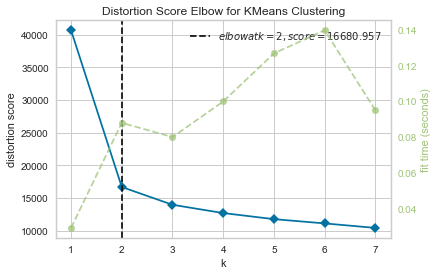

In [78]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

clusteringDataset = data_bc.iloc[: ,:-1]

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,8))

visualizer.fit(clusteringDataset)        
visualizer.show()

We can clearly see that we should choose 2 clusters for this data-set. Lets Apply K-means clustering now on the data-set and visualize the result.

# K-Means Clustering

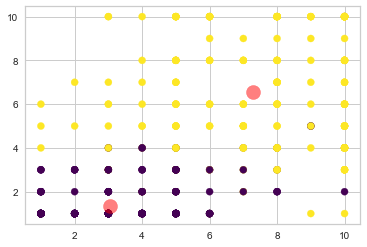

In [79]:
import matplotlib.pyplot as plt   # import the library

kmeans = KMeans(n_clusters=2)     # indicate the number of clusters

kmeans.fit(clusteringDataset)     # Train the dataset

y_kmeans = kmeans.predict(clusteringDataset)   # make prediction on the dataset

plt.scatter(clusteringDataset.iloc[:, 0], clusteringDataset.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

We understood how to use k-means clustering and how to choose optimum number of clusters from elbow curve. K-means clustering has got lot of uses.

# Hierarchical clustering

Hierarchical Clustering is another clustering technique, which starts by refering individual observations as a cluster. Then it follows two steps:

- Identify closest data point
- Merge them as cluster

The output from Hierarchical clustering is a dendrogram.

# Creating a Simple Dataset using Numpy

To apply and visualize hierarchical clustering, we decided to generate a simple data-set. The data-set has two columns, since two-dimensionals data is easy to visualize.

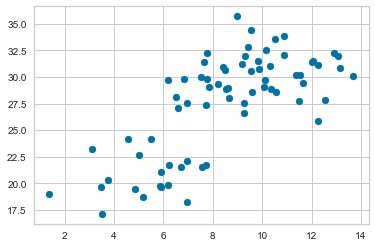

In [80]:
np.random.seed(4715) 
a = np.random.multivariate_normal([10, 30], [[3, 1], [1, 4]], size=[50,])
b = np.random.multivariate_normal([5, 20], [[3, 1], [1, 4]], size=[20,])
X = np.concatenate((a, b),)
plt.scatter(X[:,0], X[:,1])
plt.show()

We have created the data-set and plotted a scatterplot.

# Hierarchical Clustering Uses Dendrogram for Visualization
Let us visualize the dendrogram. A dendrogram is a structure that shows the hierarchical relationship between data. It is most commonly created as an output of hierarchical clustering. The main use of a dendrogram is to find out the best way to allocate data-points to clusters. In the dendrogram diagram, the height of the dendrogram indicates the order in which the clusters were joined. A more informative dendrogram can be generated where the heights reflect the distance between the clusters. 

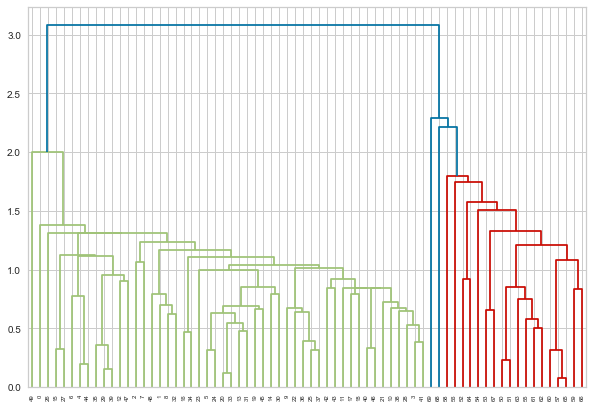

In [81]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'single')

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',            
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

From the dendrogram, we can understand that there are basically 2 clusters. 

# Hierarchical Clustering
Now let me perform Hierarchical Clustering using 2 clusters.

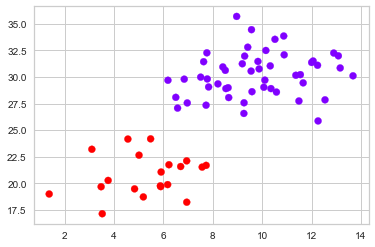

In [85]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

cluster.fit_predict(X)

plt.scatter(X[:,0],X[:,1], c=cluster.labels_, cmap='rainbow')

The above diagram shows the hierarchical visulaization of the two cluster, further work be done by perform hyper-parameter tuning on the dataset for better results

# Note
- Hierarchical Clustering is preferred when the data is small. 
- K-Mean Clustering is preferred When the data-set is large enough because it is more robust.